<a href="https://colab.research.google.com/github/gustapfp/intro-ml/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
swap = {
    'no':0,
    'yes':1
}
data.sold = data.sold.map(swap)
data

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [2]:
from datetime import datetime

current_year = datetime.today().year
data['age'] = current_year - data.model_year 
data['km_per_year'] = data.mileage_per_year * 1.609344

In [3]:
data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'])
data

,price,sold,age,km_per_year
0,30941.02,1,21,35085.308544
1,40557.96,1,23,12622.084992
2,89627.50,0,15,11440.826496
3,95276.14,0,6,43167.434112
4,117384.68,1,7,12770.144640
...,...,...,...,...
9995,97112.86,0,15,25060.704768
9996,107424.63,1,19,21317.370624
9997,93856.99,0,7,20950.440192
9998,51250.57,1,10,16840.175616


In [4]:
x = data[['price', 'age', 'km_per_year']]
y = data['sold']

In [5]:
SEED = 5

np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify=y) 
model = LinearSVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

acy_sre = accuracy_score(y_test, predictions)
print(f"The accuracy score of this model is: {(acy_sre)*100}")

The accuracy score of this model is: 57.99999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy_predictions = dummy.predict(x_test)
dummy.score(x_test, y_test)
# print(f"The dummy accuracy score is: {(dummy_acy_sre)*100}")

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.504

In [7]:
x = data[['price', 'age', 'km_per_year']]
y = data['sold']

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5

np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y) 

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

acy_sre = accuracy_score(y_test, predictions)*100
print(f"The accuracy score of this model is: {(acy_sre)}")

The accuracy score of this model is: 77.48


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

SEED = 5

np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y) 

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

acy_sre = accuracy_score(y_test, predictions)*100
print(f"The accuracy score of this model is: {(acy_sre)}")

The accuracy score of this model is: 76.84


In [10]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


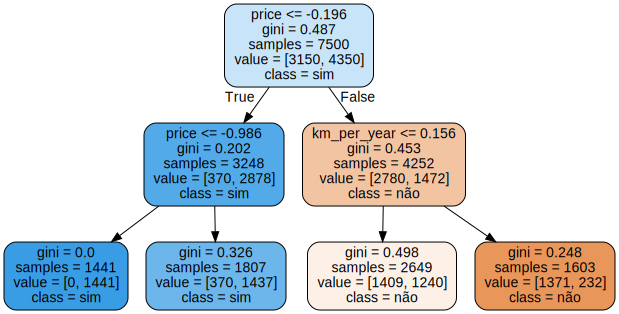

In [14]:
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names = features, class_names=['não', 'sim'])
graphviz.Source(dot_data)